<a href="https://colab.research.google.com/github/Abhi290703/Final_year/blob/main/Pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run First

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/drive/MyDrive/archive (8).zip'

# Directory to extract the contents
extract_to_path = '/content'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Contents extracted to {extract_to_path}")

Contents extracted to /content


# **Pneumonia detection using VGG16(Deep Learning)**

## **1. Import Libraries**

In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten,Conv2D,MaxPooling2D
from keras.models import Model,Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
#from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

## **2.Pre-Processing**

In [ ]:
image_size=[224,224]
train_path='/content/chest_xray/train'
test_path='/content/chest_xray/test'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Paths to your dataset directories
train_path = '/content/chest_xray/train'
test_path = '/content/chest_xray/test'

# Target image size
image_size = [224, 224]

# Image data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create datasets from directories
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/14
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 761ms/step - accuracy: 0.7503 - loss: 0.5522 - val_accuracy: 0.6924 - val_loss: 0.5438
Epoch 2/14
  1/163 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.8750 - loss: 0.4356

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.8750 - loss: 0.4356 - val_accuracy: 0.7105 - val_loss: 0.5353
Epoch 3/14
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 862ms/step - accuracy: 0.7745 - loss: 0.4504 - val_accuracy: 0.7138 - val_loss: 0.5174
Epoch 4/14
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.8125 - loss: 0.4155 - val_accuracy: 0.7336 - val_loss: 0.5048
Epoch 5/14
163/163 ━━━━━━━━━━━━━━━━━━━━ 203s 907ms/step - accuracy: 0.8148 - loss: 0.3959 - val_accuracy: 0.7615 - val_loss: 0.4658
Epoch 6/14
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.6562 - loss: 0.4887 - val_accuracy: 0.7434 - val_loss: 0.4794
Epoch 7/14
163/163 ━━━━━━━━━━━━━━━━━━━━ 201s 961ms/step - accuracy: 0.8141 - loss: 0.3746 - val_accuracy: 0.6760 - val_loss: 0.6459
Epoch 8/14
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.6875 - loss: 0.5519 - val_accuracy: 0.7451 - val_loss: 0.4910
Epoch 9/14
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 882ms/step - accuracy: 0.8276 - loss: 0.3713 - val_ac

Test Loss: 0.4168853759765625
Test Accuracy: 0.7980769276618958


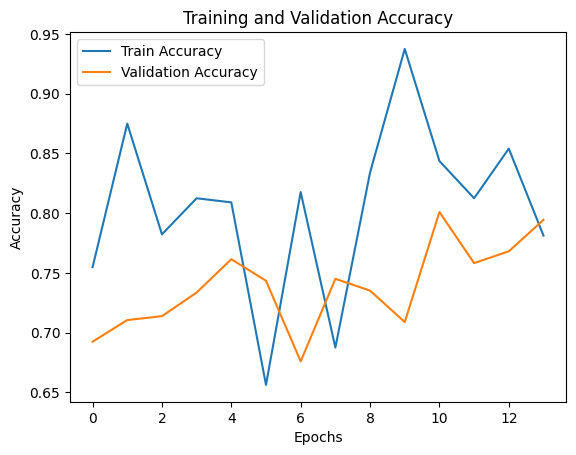

In [ ]:

# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

# Define the model
model1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model1.fit(
    train_data,
    validation_data=test_data,
    epochs=14,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=test_data.samples // test_data.batch_size
)

# Evaluate the model on the test data
test_loss, test_accuracy = model1.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the model
model1.save('resnet_chest_xray_model.h5')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 138s 772ms/step - accuracy: 0.7484 - loss: 0.4979 - val_accuracy: 0.8734 - val_loss: 0.3298
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9375 - loss: 0.2529 - val_accuracy: 0.8651 - val_loss: 0.3288
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 174s 717ms/step - accuracy: 0.9162 - loss: 0.2176 - val_accuracy: 0.8947 - val_loss: 0.2810
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9375 - loss: 0.2203 - val_accuracy: 0.8914 - val_loss: 0.2737
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 791ms/step - accuracy: 0.9280 - loss: 0.1941 - val_accuracy: 0.8947 - val_loss: 0.2742
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9688 - loss: 0.1382 - val_accuracy: 0.8931 - val_loss: 0.2738
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 715ms/step - accuracy: 0.9268 - loss: 0.1675 - val_accuracy: 0.8914 - val_loss: 0.2715
Epoch 8/10
163/163 ━━━━━━━━━━━━━━

Test Loss (VGG16): 0.2058648318052292
Test Accuracy (VGG16): 0.9198718070983887


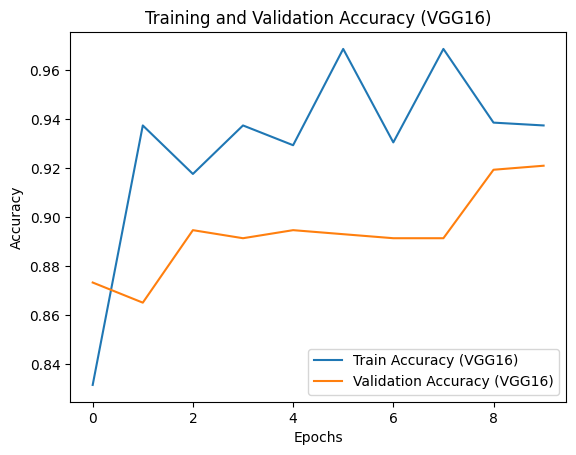

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the VGG16 model pre-trained on ImageNet
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model_vgg.trainable = False

# Add custom layers on top of the base model
x_vgg = base_model_vgg.output
x_vgg = GlobalAveragePooling2D()(x_vgg)
x_vgg = Dense(128, activation='relu')(x_vgg)
predictions_vgg = Dense(train_data.num_classes, activation='softmax')(x_vgg)

# Define the model
model2 = Model(inputs=base_model_vgg.input, outputs=predictions_vgg)

# Compile the model
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_vgg = model2.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=test_data.samples // test_data.batch_size
)

# Evaluate the model on the test data
test_loss_vgg, test_accuracy_vgg = model2.evaluate(test_data)
print(f"Test Loss (VGG16): {test_loss_vgg}")
print(f"Test Accuracy (VGG16): {test_accuracy_vgg}")

# Save the model
model2.save('vgg16_chest_xray_model.h5')

# Plot training and validation accuracy for VGG16
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy (VGG16)')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy (VGG16)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (VGG16)')
plt.show()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 167s 850ms/step - accuracy: 0.8582 - loss: 0.3166 - val_accuracy: 0.9145 - val_loss: 0.2259
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.8438 - loss: 0.5171 - val_accuracy: 0.9030 - val_loss: 0.2302
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 156s 695ms/step - accuracy: 0.9311 - loss: 0.1759 - val_accuracy: 0.9013 - val_loss: 0.2328
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9688 - loss: 0.1890 - val_accuracy: 0.8931 - val_loss: 0.2654
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 702ms/step - accuracy: 0.9439 - loss: 0.1323 - val_accuracy: 0.9128 - val_loss: 0.2020
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 1.0000 - loss: 0.0478 - val_accuracy: 0.8947 - val_loss: 0.2546
Epoch 7/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 761ms/step - accuracy: 0.9369 - loss: 0.1523 - val_accuracy: 0.9227 - val_loss: 0.2052
Epoch 8/12
163/163 ━━━━━━━━━━━━━━━

Test Loss (DenseNet121): 0.16308940947055817
Test Accuracy (DenseNet121): 0.9375


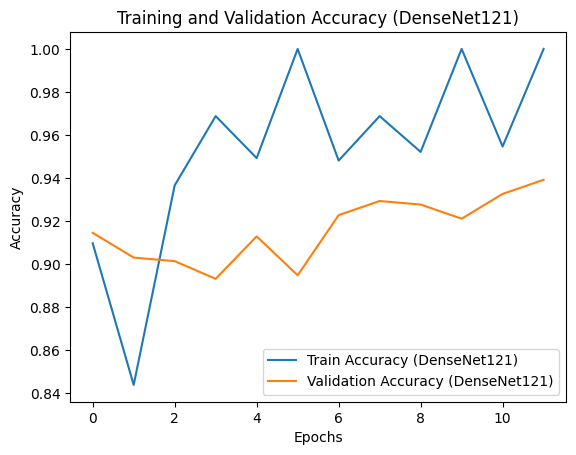

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the DenseNet121 model pre-trained on ImageNet
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model_densenet.trainable = False

# Add custom layers on top of the base model
x_densenet = base_model_densenet.output
x_densenet = GlobalAveragePooling2D()(x_densenet)
x_densenet = Dense(128, activation='relu')(x_densenet)
predictions_densenet = Dense(train_data.num_classes, activation='softmax')(x_densenet)

# Define the model
model3 = Model(inputs=base_model_densenet.input, outputs=predictions_densenet)

# Compile the model
model3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_densenet = model3.fit(
    train_data,
    validation_data=test_data,
    epochs=12,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=test_data.samples // test_data.batch_size
)

# Evaluate the model on the test data
test_loss_densenet, test_accuracy_densenet = model3.evaluate(test_data)
print(f"Test Loss (DenseNet121): {test_loss_densenet}")
print(f"Test Accuracy (DenseNet121): {test_accuracy_densenet}")

# Save the model
model3.save('densenet_chest_xray_model.h5')

# Plot training and validation accuracy for DenseNet121
plt.plot(history_densenet.history['accuracy'], label='Train Accuracy (DenseNet121)')
plt.plot(history_densenet.history['val_accuracy'], label='Validation Accuracy (DenseNet121)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (DenseNet121)')
plt.show()
